In [55]:
import numpy as np
from scipy.stats import beta
from scipy.stats import norm
import matplotlib.pyplot as plt

# Tools of Parameter Estimation: PDF, CDF, Quantile Function

Estimating the Conversion Rate for an Email Signup List
Say you run a blog and want to know the probability that a visitor to your blog will subscribe to your email list. In marketing terms, getting a user to perform a desired event is referred to as the conversion event, or simply a conversion, and the probability that a user will subscribe is the conversion rate.

In the case of estimating the true conversion rate for your email list, let’s say for the first 40,000 visitors, you get 300 subscribers

In [35]:
a, b = 300, 40000-300

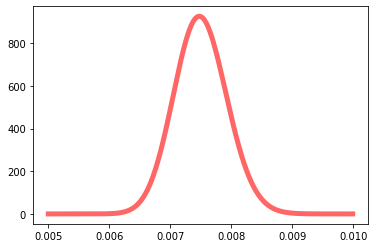

In [39]:
x = np.arange(0.005, 0.01, 0.00001)
plt.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')

The probability of the actual rate being lower than 0.0065

In [40]:
x = [0, 0.0065]
lowb= beta.sf(x, a, b)[0] - beta.sf(x, a, b)[1] 
lowb

0.007978686170755811

The probability of conversion rate being higher than expected (0.0085 or higher)

In [41]:
x = [0.0085, 1]
highb = beta.sf(x, a, b)[0] - beta.sf(x, a, b)[1] 
highb

0.01248151030103659

In [42]:
ratio = highb/lowb
ratio

1.5643565912875392

50 percent more likely that our true conversion rate is greater than 0.0085 than that it’s lower than 0.0065.

## Cumulative Distribution Function (CDF)

The CDF takes in a value and returns the probability of getting that value or lower. For example, the CDF for Beta(300,397000) when x = 0.0065 is approximately 0.008. This means that the probability of the true conversion rate being 0.0065 or less is 0.008.

In [43]:
beta.cdf(0.0065, 300, 39700)

0.007978686170755788

true probability that the conversion rate is greater than 0.0085, we can do the following:

In [47]:
beta.cdf(1, 300, 39700) - beta.cdf(0.0085, 300, 39700)

0.012481510301036614

## Quantile Function for Beta distribution

In [49]:
beta.ppf(0.999, 300, 39700)

0.008903462119425339

99.9 percent certain that the true conversion rate for our emails is less than 0.0089

Finding 95% Confidence Interval

In [50]:
lower_bound = beta.ppf(0.025, 300, 39700)
upper_bound = beta.ppf(0.975, 300, 39700)

In [51]:
lower_bound

0.0066780740443999455

In [52]:
upper_bound

0.008368562363890978

Suppose an article on your blog goes viral and gets 100,000 visitors. Based on 95% confidence, we know that we should expect between 667 and 837 new email subscribers.

## You have the following measurements (in inches) of snowfall: 
## 7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4
## What is your 99.9 percent confidence interval for the true value of snowfall?

vals = np.array([7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])
mu = vals.mean()
sigma = vals.std(ddof=1)   # this argument is required to achieve same results as in R, since we are calculating sd for samples
                           # and not for the population - by default ddof is 0 and it is calculating sd for population

In [57]:
lower = norm.ppf(0.0005, loc=mu, scale=sigma)
upper = norm.ppf(0.9995, loc=mu, scale=sigma)

In [58]:
lower

4.456061591417175

In [59]:
upper

11.923938408582863

## A child is going door to door selling candy bars. So far she has visited 30 houses and sold 10 candy bars. She will visit 40 more houses today. What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day?

In [60]:
a, b = 10, 20

In [61]:
upper = beta.ppf(0.975, a, b)
lower = beta.ppf(0.025, a, b)

In [65]:
lower * 40

7.175345969404473

In [64]:
upper * 40

20.332934152399602

She should expect to sell between 7 and 20 candy bars